In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [37]:
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Data Visualization

In [38]:
# plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

In [39]:
# plt.bar(data['Size'].value_counts().index, data['Size'].value_counts().values)

In [40]:
# plt.bar(data['Area Type'].value_counts().index, data['Area Type'].value_counts().values)

In [41]:
# plt.bar(data['Area Locality'].value_counts().index, data['Area Locality'].value_counts().values)

In [42]:
# plt.bar(data['Furnishing Status'].value_counts().index, data['Furnishing Status'].value_counts().values)

In [43]:
# plt.bar(data['Bathroom'].value_counts().index, data['Bathroom'].value_counts().values)

## Preprocessing

### Conversion of Categorical Variable to One-Hot Encoding

In [44]:
data['Price_per_sqft'] = data['Rent'] / data['Size']

In [45]:
from datetime import datetime
# Assuming 'Posted On' contains the date strings in 'YYYY-MM-DD' format
date_format = '%Y-%m-%d'  # Corrected format string

# Convert the 'Posted On' column to datetime objects
data['Posted On'] = pd.to_datetime(data['Posted On'], format=date_format)

# Specify the target date
target_date = datetime(2023, 9, 5)

# Calculate the difference in days and store it in a new column
data['Days_since_posting'] = (target_date - data['Posted On']).dt.days

In [46]:
data = data[['BHK', 'Size', 'Bathroom', 'Rent']]

In [47]:
data.head(5)

,BHK,Size,Bathroom,Rent
0,2,1100,2,10000
1,2,800,1,20000
2,2,1000,1,17000
3,2,800,1,10000
4,2,850,1,7500


In [48]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [49]:
data.head(5)

,BHK,Size,Bathroom,Rent
0,2,1100,2,10000
1,2,800,1,20000
2,2,1000,1,17000
3,2,800,1,10000
4,2,850,1,7500


### Cleaning Outliers for Integer Data Type

In [50]:
columns_to_check = ['BHK', 'Size', 'Bathroom'] 

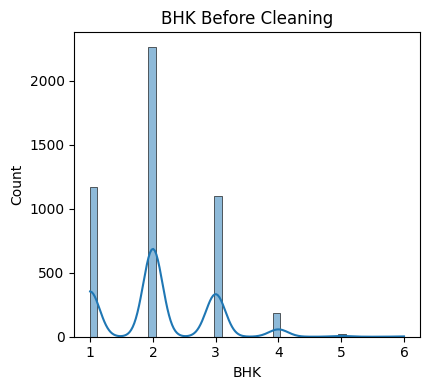

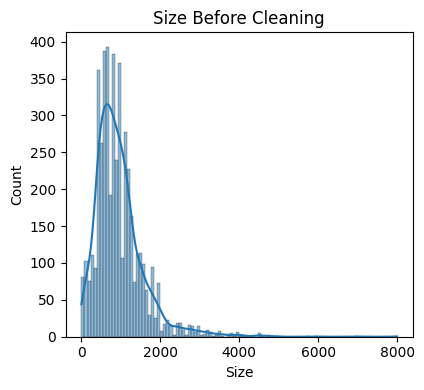

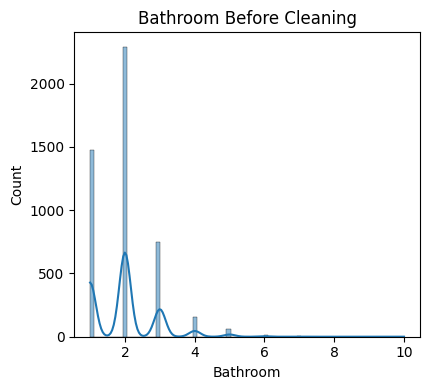

In [51]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'{column_name} Before Cleaning')

    plt.tight_layout()
    plt.show()

In [52]:

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[column_name] >= Q1 - 1.5*IQR) & (data[column_name] <= Q3 + 1.5*IQR)]

In [53]:
data.shape

(4432, 4)

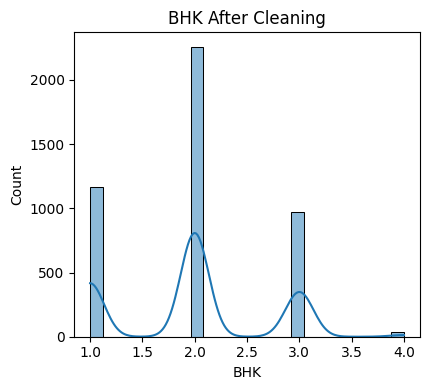

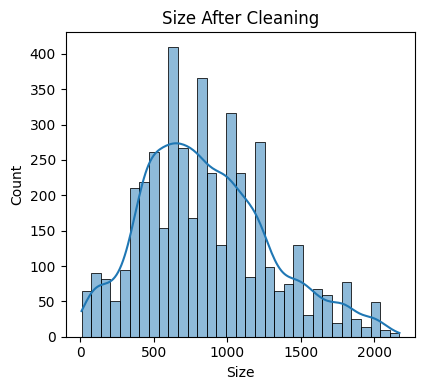

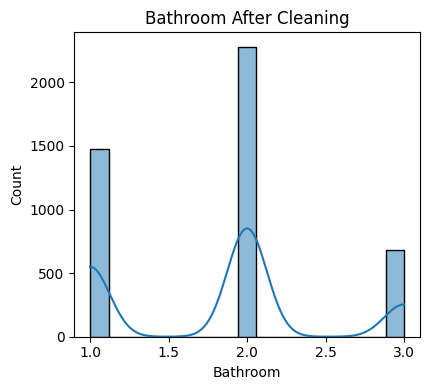

In [54]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'{column_name} After Cleaning')

    plt.tight_layout()
    plt.show()

### Training and Test Split

In [55]:
X = data.drop('Rent', axis=1)
y = data['Rent']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardizing the Values

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [58]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 2127.99823234,   126.49946184, 11831.74080938])

## Evaluation

### Quantitative Evaluation

In [59]:
y_preds = model.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 2127.99823234   126.49946184 11831.74080938]
Mean squared error: 813836024.44
Coefficient of determination: 0.20


### Qualitative Evaluation

In [61]:
sample_data = X.iloc[0]
sample_data

BHK            2
Size        1100
Bathroom       2
Name: 0, dtype: int64

In [62]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

In [63]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

28459.01996898513

In [64]:
y.iloc[0]

10000

## Simple Linear Regression Model

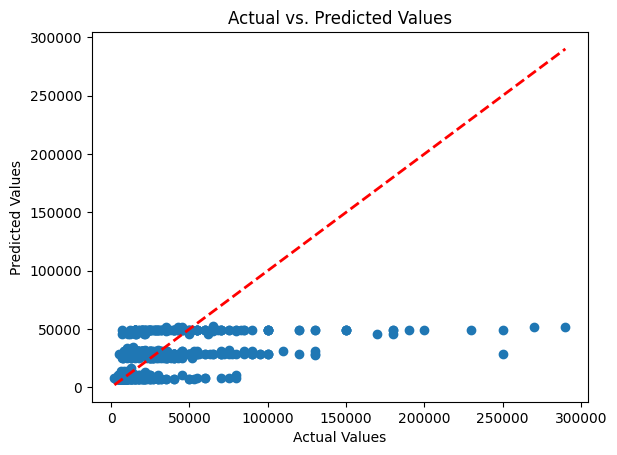

In [65]:
plt.scatter(y_test, y_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.savefig("linear_regression_plot.png")
plt.show()

In [66]:
data

,BHK,Size,Bathroom,Rent
0,2,1100,2,10000
1,2,800,1,20000
2,2,1000,1,17000
3,2,800,1,10000
4,2,850,1,7500
...,...,...,...,...
4741,2,1000,2,15000
4742,3,2000,3,29000
4743,3,1750,3,35000
4744,3,1500,2,45000
